In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

###  Приближенно решить уравнение e^(-ax) = blnx
Использовать методы бисекции, Ньютона, секущих

In [16]:
def f(x, a=1, b=1):
    return np.exp(a*x)*b*np.log(x) - 1

def df(x, a=1, b=1):
    return b*(a*np.exp(a*x)*np.log(x) + np.exp(a*x)/x)


def bisection(f, l=0, r=1, eps=1e-10, y=0, *args, **kwargs):
    citer = 0
    while abs(r - l) >= eps:
        citer += 1
        mid = (l + r) / 2
        
        if f(mid, *args, **kwargs) == y:
            return mid, citer
        
        if (f(mid, *args, **kwargs) - y) * (f(l, *args, **kwargs) - y) < 0:
            r = mid
        else:
            l = mid

    return (r + l) / 2, citer


def newton(f, df, x0=1e-5, eps=1e-10, y=0, *args, **kwargs):
    x1 = x0 - f(x0) / df(x0)

    citer = 0
    while abs(x1 - x0) >= eps:
        citer += 1
        if f(x1, *args, **kwargs) == y: return x1, citer
        x0 = x1
        x1 = x0 - (f(x0, *args, **kwargs) - y) / df(x0, *args, **kwargs)

    return x1, citer


def secant(f, x0=1e-5, x1=1, eps=1e-10, y=0, *args, **kwargs):
    x2 = (x0*f(x1, *args, **kwargs) - x1*f(x0, *args, **kwargs)) / (f(x1, *args, **kwargs) - f(x0, *args, **kwargs))

    citer = 0
    while abs(x2 - x1) >= eps:
        citer += 1
        if (f(x2) == y): return x2, citer
        x0 = x1
        x1 = x2
        x2 = (x0*(f(x1, *args, **kwargs) - y) - x1*(f(x0, *args, **kwargs) - y)) / ((f(x1, *args, **kwargs) - y) - (f(x0, *args, **kwargs) - y))

    return x2, citer

print(bisection(f, 1, 2))
print(newton(f, df))
print(secant(f))

(1.309799585811561, 34)
(1.3097995858041505, 10)
(1.3097995858041507, 6)


In [17]:
from scipy.optimize import fsolve

a_range = np.arange(1, 4.1, 0.5)
b_range = np.arange(1, 4.1, 0.5)

arguments = []
bisection_results = []
newton_results = []
secant_results = []
true_values = []

for a in a_range:
    for b in b_range:
        arguments.append((a, b))
        f = lambda x: np.exp(a*x)*b*np.log(x+1e-15) - 1
        df = lambda x: b*(a*np.exp(a*x)*np.log(x) + np.exp(a*x)/x)
        bisection_results.append(bisection(f, 1e-5, 2, 1e-10)[0])
        newton_results.append(newton(f, df, 0.1, 1e-10)[0])
        secant_results.append(secant(f, 0.1, 1, 1e-10)[0])
        true_values.append(fsolve(f, 1, epsfcn=1e-10)[0])

print(arguments)
print(true_values)
print(bisection_results)
print(newton_results)
print(secant_results)

[(1.0, 1.0), (1.0, 1.5), (1.0, 2.0), (1.0, 2.5), (1.0, 3.0), (1.0, 3.5), (1.0, 4.0), (1.5, 1.0), (1.5, 1.5), (1.5, 2.0), (1.5, 2.5), (1.5, 3.0), (1.5, 3.5), (1.5, 4.0), (2.0, 1.0), (2.0, 1.5), (2.0, 2.0), (2.0, 2.5), (2.0, 3.0), (2.0, 3.5), (2.0, 4.0), (2.5, 1.0), (2.5, 1.5), (2.5, 2.0), (2.5, 2.5), (2.5, 3.0), (2.5, 3.5), (2.5, 4.0), (3.0, 1.0), (3.0, 1.5), (3.0, 2.0), (3.0, 2.5), (3.0, 3.0), (3.0, 3.5), (3.0, 4.0), (3.5, 1.0), (3.5, 1.5), (3.5, 2.0), (3.5, 2.5), (3.5, 3.0), (3.5, 3.5), (3.5, 4.0), (4.0, 1.0), (4.0, 1.5), (4.0, 2.0), (4.0, 2.5), (4.0, 3.0), (4.0, 3.5), (4.0, 4.0)]
[1.309799585804149, 1.2180039049314373, 1.1681989617247068, 1.1369193863192542, 1.115448017216539, 1.0997967163208615, 1.0878816532500764, 1.1843783047309087, 1.1301702005306542, 1.1006789435451432, 1.0821066398584134, 1.069328293613137, 1.0599956852449135, 1.0528795479195385, 1.1138082774920133, 1.0799281053801515, 1.0616441472036047, 1.0501832021272177, 1.0423215622673325, 1.036592058683518, 1.032230181443

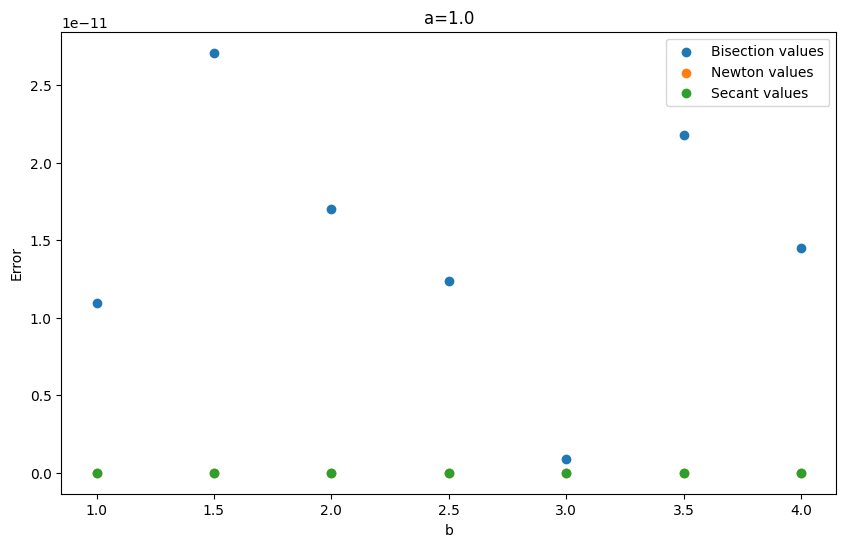

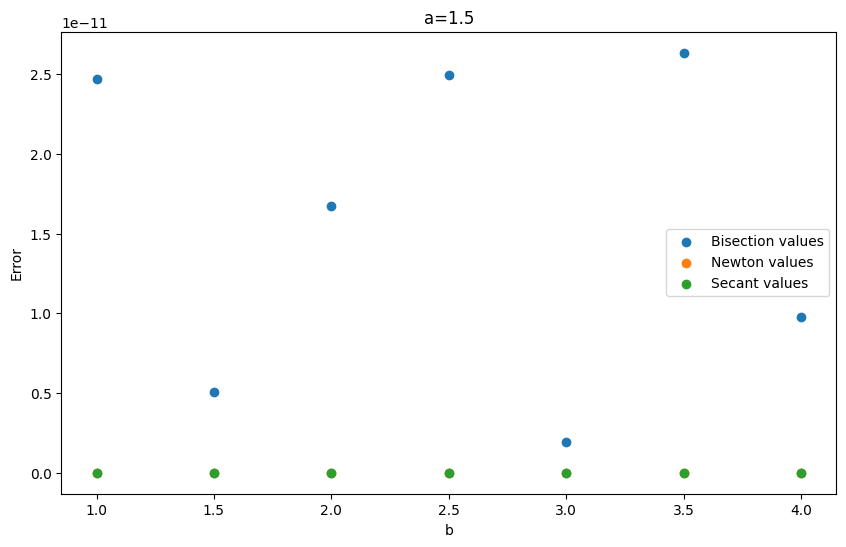

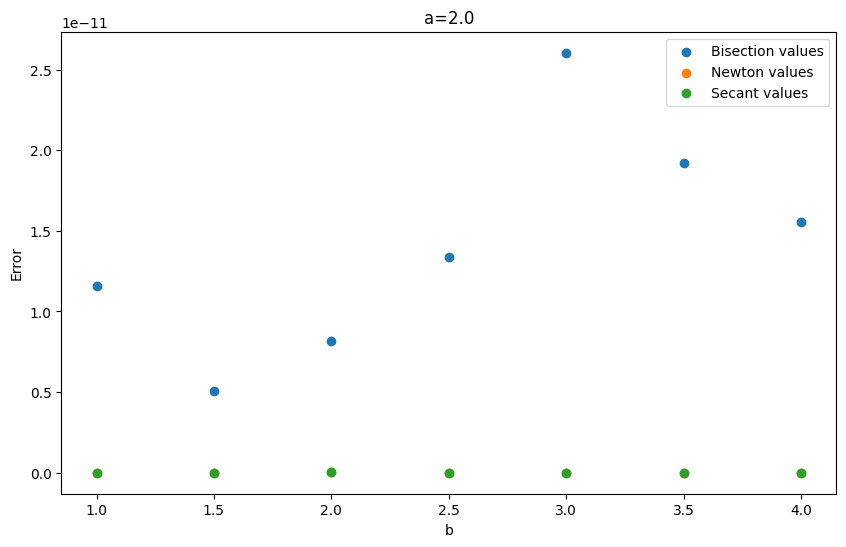

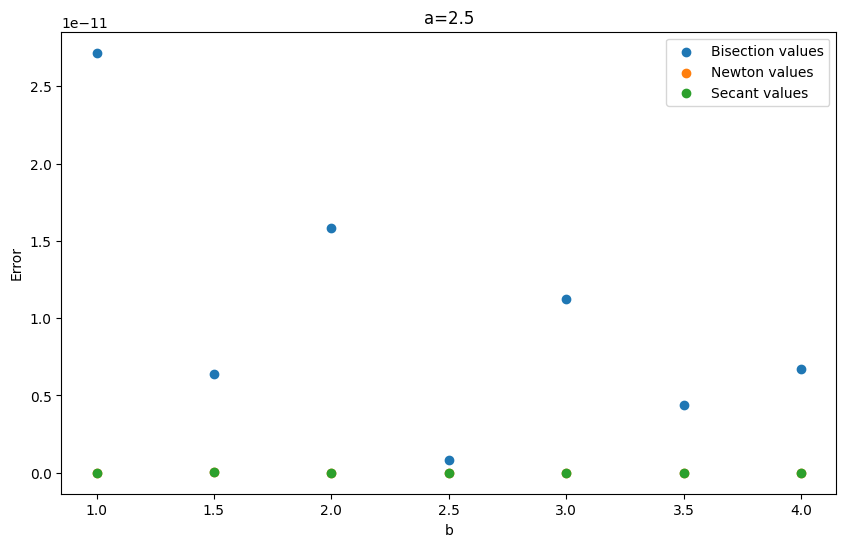

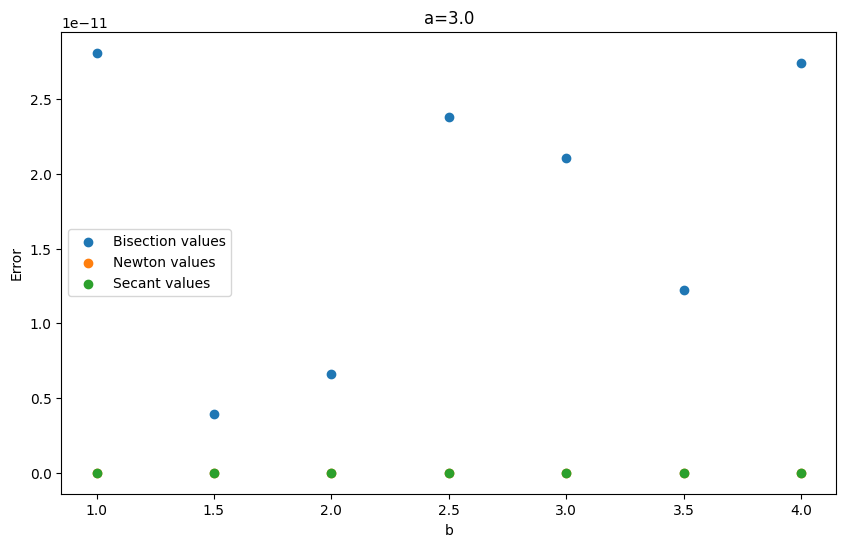

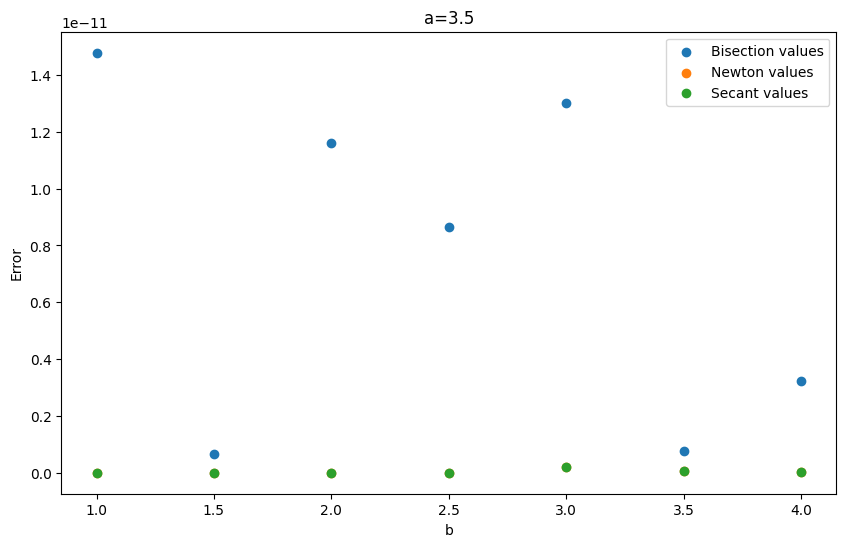

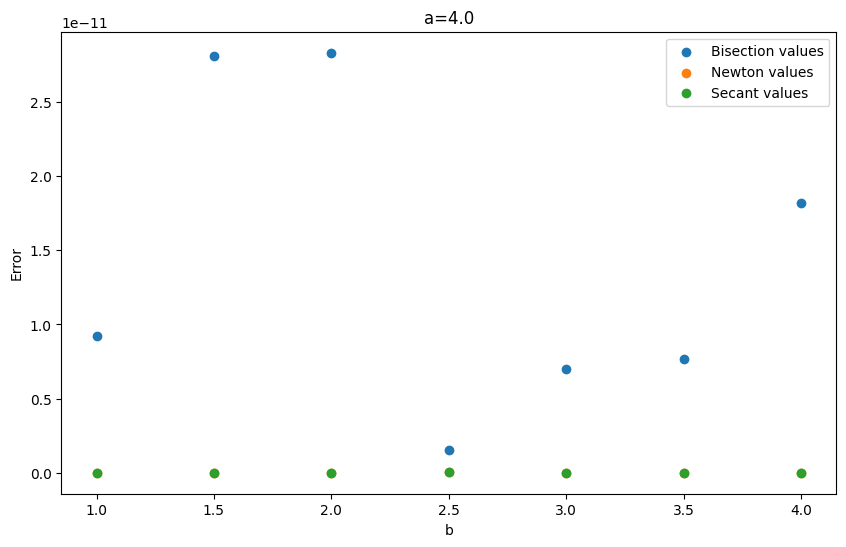

In [18]:
for i, a in enumerate(a_range):
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    axes.set_title(f"a={a}")
    axes.set_xlabel("b")
    axes.set_ylabel("Error")

    first_index = i*len(a_range)
    last_index = (i+1)*len(b_range)

    tvalues = np.array([x for x in true_values[first_index:last_index]])
    bisection_values = np.abs(tvalues - np.array([x for x in bisection_results[first_index:last_index]]))
    newton_values = np.abs(tvalues - np.array([x for x in newton_results[first_index:last_index]]))
    secant_values = np.abs(tvalues - np.array([x for x in secant_results[first_index:last_index]]))
    # axes.scatter(b_range, tvalues, label="True values")
    axes.scatter(b_range, bisection_values, label="Bisection values")
    axes.scatter(b_range, newton_values, label="Newton values")
    axes.scatter(b_range, secant_values, label="Secant values")
    plt.legend()
    plt.show()

### Решение задачи про русла

Даны два пересекающихся под углом **γ** канала с диаметрами **a** и **b**. Требуется найти максимальную длину бревна **L**, которое можно протащить через это пересечение.

![alt text](<Screenshot 2025-05-30 075621.png>)

Задача сводится к отысканию минимума функции L(x).

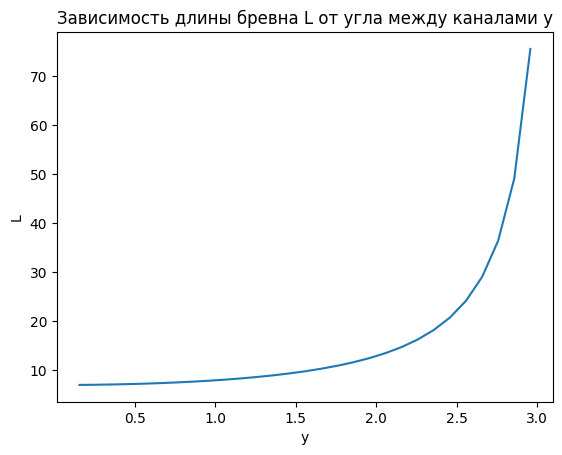

In [59]:
def solve(a, b, y):
    L = lambda x: b/np.sin(x+1e-11) + a/np.sin(x+y+1e-11)
    dL = lambda x: (-b*np.cos(x)/np.sin(x+1e-11)**2 - a*np.cos(x+y)/np.sin(x+y+1e-11)**2) / (a + b)

    zero, _ = bisection(dL, l=0, r=np.pi)
    if dL(zero-0.01) < 0 and dL(zero+0.01) > 0:
        return L(zero)
    
    print("Найденная критическая точка не минимум")
    return None


a, b, y = 3, 4, np.pi/2
ys = np.arange(np.pi/20, np.pi-0.1, 0.1)
ls = []

for y in ys:
    ls.append(solve(a, b, y))

plt.title("Зависимость длины бревна L от угла между каналами y")
plt.xlabel("y")
plt.ylabel("L")
plt.plot(ys, ls)
plt.show()

### Поиск обратной функции
f(x) = e^(ax) * blnx - 1

In [8]:
from scipy.optimize import fsolve

def inverse(f, y, method='bisection', df=None, l=1e-5, r=10, x0=1.0, x1=2.0, eps=1e-12, *args, **kwargs):
    if method == 'bisection':
        return bisection(f, l=l, r=r, eps=eps, y=y, *args, **kwargs)
    elif method == 'newton':
        if df is None:
            print("Для метода Ньютона необходимо предоставить производную функции f.")
        return newton(f, df, x0=x0, eps=eps, y=y, *args, **kwargs)
    elif method == 'secant':
        return secant(f, x0=x0, x1=x1, eps=eps, y=y, *args, **kwargs)
    else:
        return 0, -1


Бисекция: x = 2.9999999999998295, итераций: 44
Ньютон: x = 3.0, итераций: 8
Секущие: x = 3.0, итераций: 9


Text(0, 0.5, 'x')

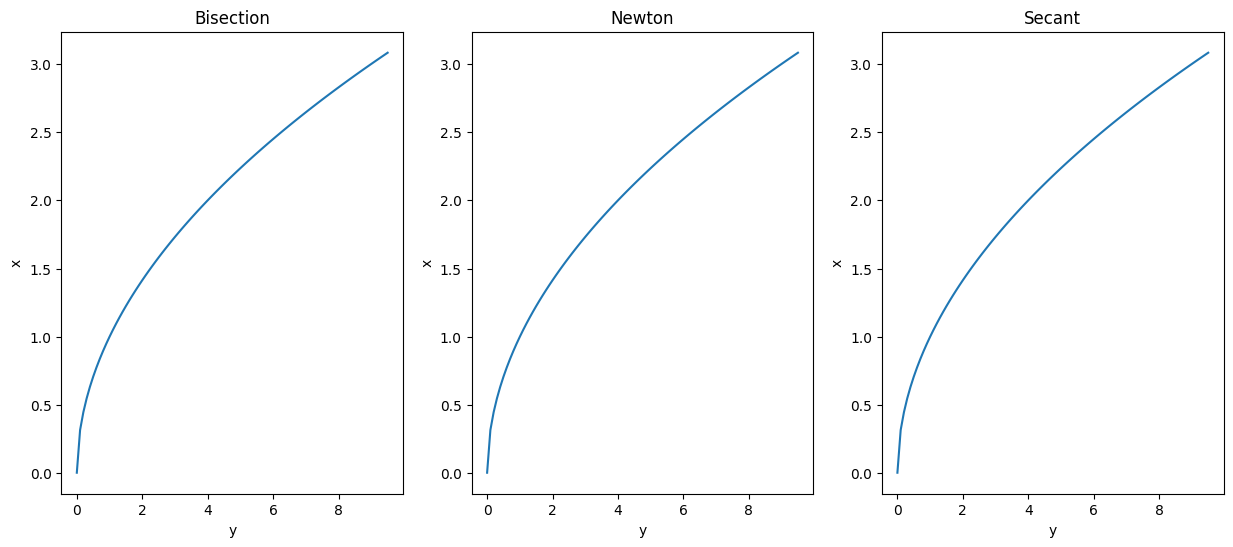

In [9]:
f1 = lambda x: x**2
df1 = lambda x: 2*x

y_value = 9
x_bisect, iter_bisect = inverse(f1, y_value, method='bisection', l=0, r=10)
print(f"Бисекция: x = {x_bisect}, итераций: {iter_bisect}")

x_newton, iter_newton = inverse(f1, y_value, method='newton', df=df1, x0=1.0)
print(f"Ньютон: x = {x_newton}, итераций: {iter_newton}")

x_secant, iter_secant = inverse(f1, y_value, method='secant', x0=1.0, x1=10.0)
print(f"Секущие: x = {x_secant}, итераций: {iter_secant}")

ys = np.arange(1e-5, 9.55, 0.1)
xs_bisect = []
xs_newton = []
xs_secant = []
l, l_iter = inverse(f1, ys[0], 'newton', df=df1, x0=1e-15)
r, r_iter = inverse(f1, ys[-1], 'newton', df=df1, x0=4)
x0, niter = inverse(f1, ys[len(ys)//2-1], method='newton', df=df1, x0=1.0)
x1, niter = inverse(f1, ys[len(ys)//2+1], method='newton', df=df1, x0=1.0)
for y in ys:
    x_bisect, iter_bisect = inverse(f1, y, method='bisection', l=l, r=r)
    x_newton, iter_newton = inverse(f1, y, method='newton', df=df1, x0=x0)
    x_secant, iter_secant = inverse(f1, y, method='secant', x0=x0, x1=x1)
    xs_bisect.append(x_bisect)
    xs_newton.append(x_newton)
    xs_secant.append(x_secant)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten()

axes[0].plot(ys, xs_bisect)
axes[0].set_title("Bisection")
axes[0].set_xlabel("y")
axes[0].set_ylabel("x")

axes[1].plot(ys, xs_newton)
axes[1].set_title("Newton")
axes[1].set_xlabel("y")
axes[1].set_ylabel("x")

axes[2].plot(ys, xs_secant)
axes[2].set_title("Secant")
axes[2].set_xlabel("y")
axes[2].set_ylabel("x")

Бисекция: x = 2.71828182845897, итераций: 44
Ньютон: x = 2.718281828459045, итераций: 7
Секущие: x = 2.7182818284590455, итераций: 7


Text(0, 0.5, 'x')

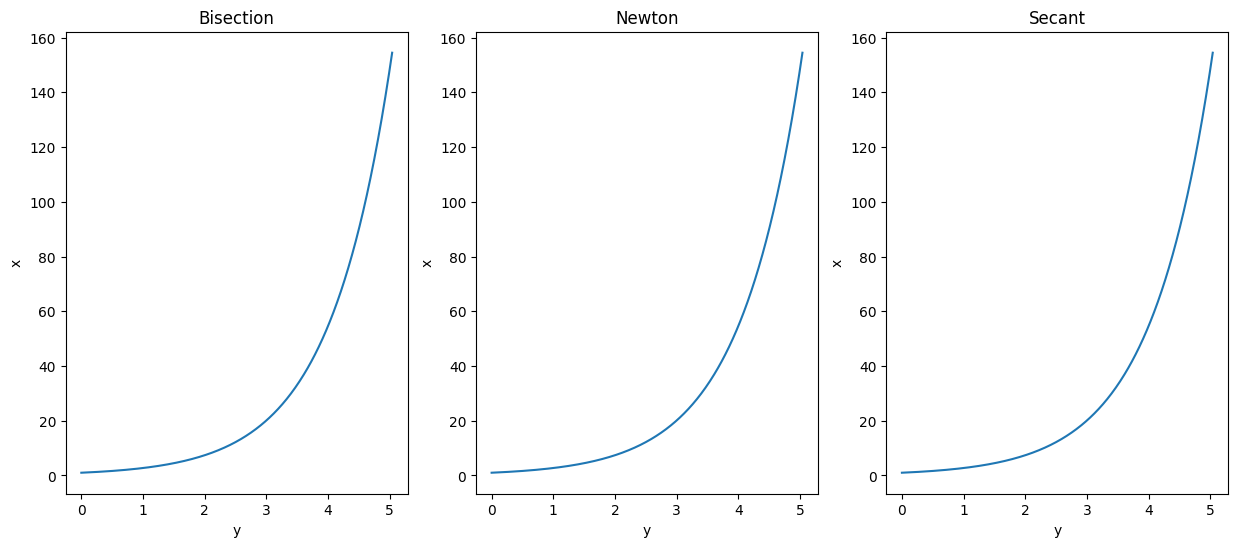

In [10]:
f2 = np.log
df2 = lambda x: 1/x

y_value = 1

x_bisect, iter_bisect = inverse(f2, y_value, method='bisection', l=1, r=10)
print(f"Бисекция: x = {x_bisect}, итераций: {iter_bisect}")

x_newton, iter_newton = inverse(f2, y_value, method='newton', df=df2, x0=2.0)
print(f"Ньютон: x = {x_newton}, итераций: {iter_newton}")

x_secant, iter_secant = inverse(f2, y_value, method='secant', x0=2.0, x1=3.0)
print(f"Секущие: x = {x_secant}, итераций: {iter_secant}")

ys = np.arange(1e-5, 5.05, 0.01)
xs_bisect = []
xs_newton = []
xs_secant = []
l, l_iter = inverse(f2, ys[0], method='newton', df=df2, x0=1e-15)
r, r_iter = inverse(f2, ys[-1], method='newton', df=df2, x0=2)
x0, niter = inverse(f2, ys[1], method='newton', df=df2, x0=2)
x1, niter = inverse(f2, ys[2], method='newton', df=df2, x0=2)
for y in ys:
    x_bisect, iter_bisect = inverse(f2, y, method='bisection', l=l, r=r)
    x_newton, iter_newton = inverse(f2, y, method='newton', df=df2, x0=x0)
    x_secant, iter_secant = inverse(f2, y, method='secant', x0=x0, x1=x1)
    xs_bisect.append(x_bisect)
    xs_newton.append(x_newton)
    xs_secant.append(x_secant)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten()

axes[0].plot(ys, xs_bisect)
axes[0].set_title("Bisection")
axes[0].set_xlabel("y")
axes[0].set_ylabel("x")

axes[1].plot(ys, xs_newton)
axes[1].set_title("Newton")
axes[1].set_xlabel("y")
axes[1].set_ylabel("x")

axes[2].plot(ys, xs_secant)
axes[2].set_title("Secant")
axes[2].set_xlabel("y")
axes[2].set_ylabel("x")

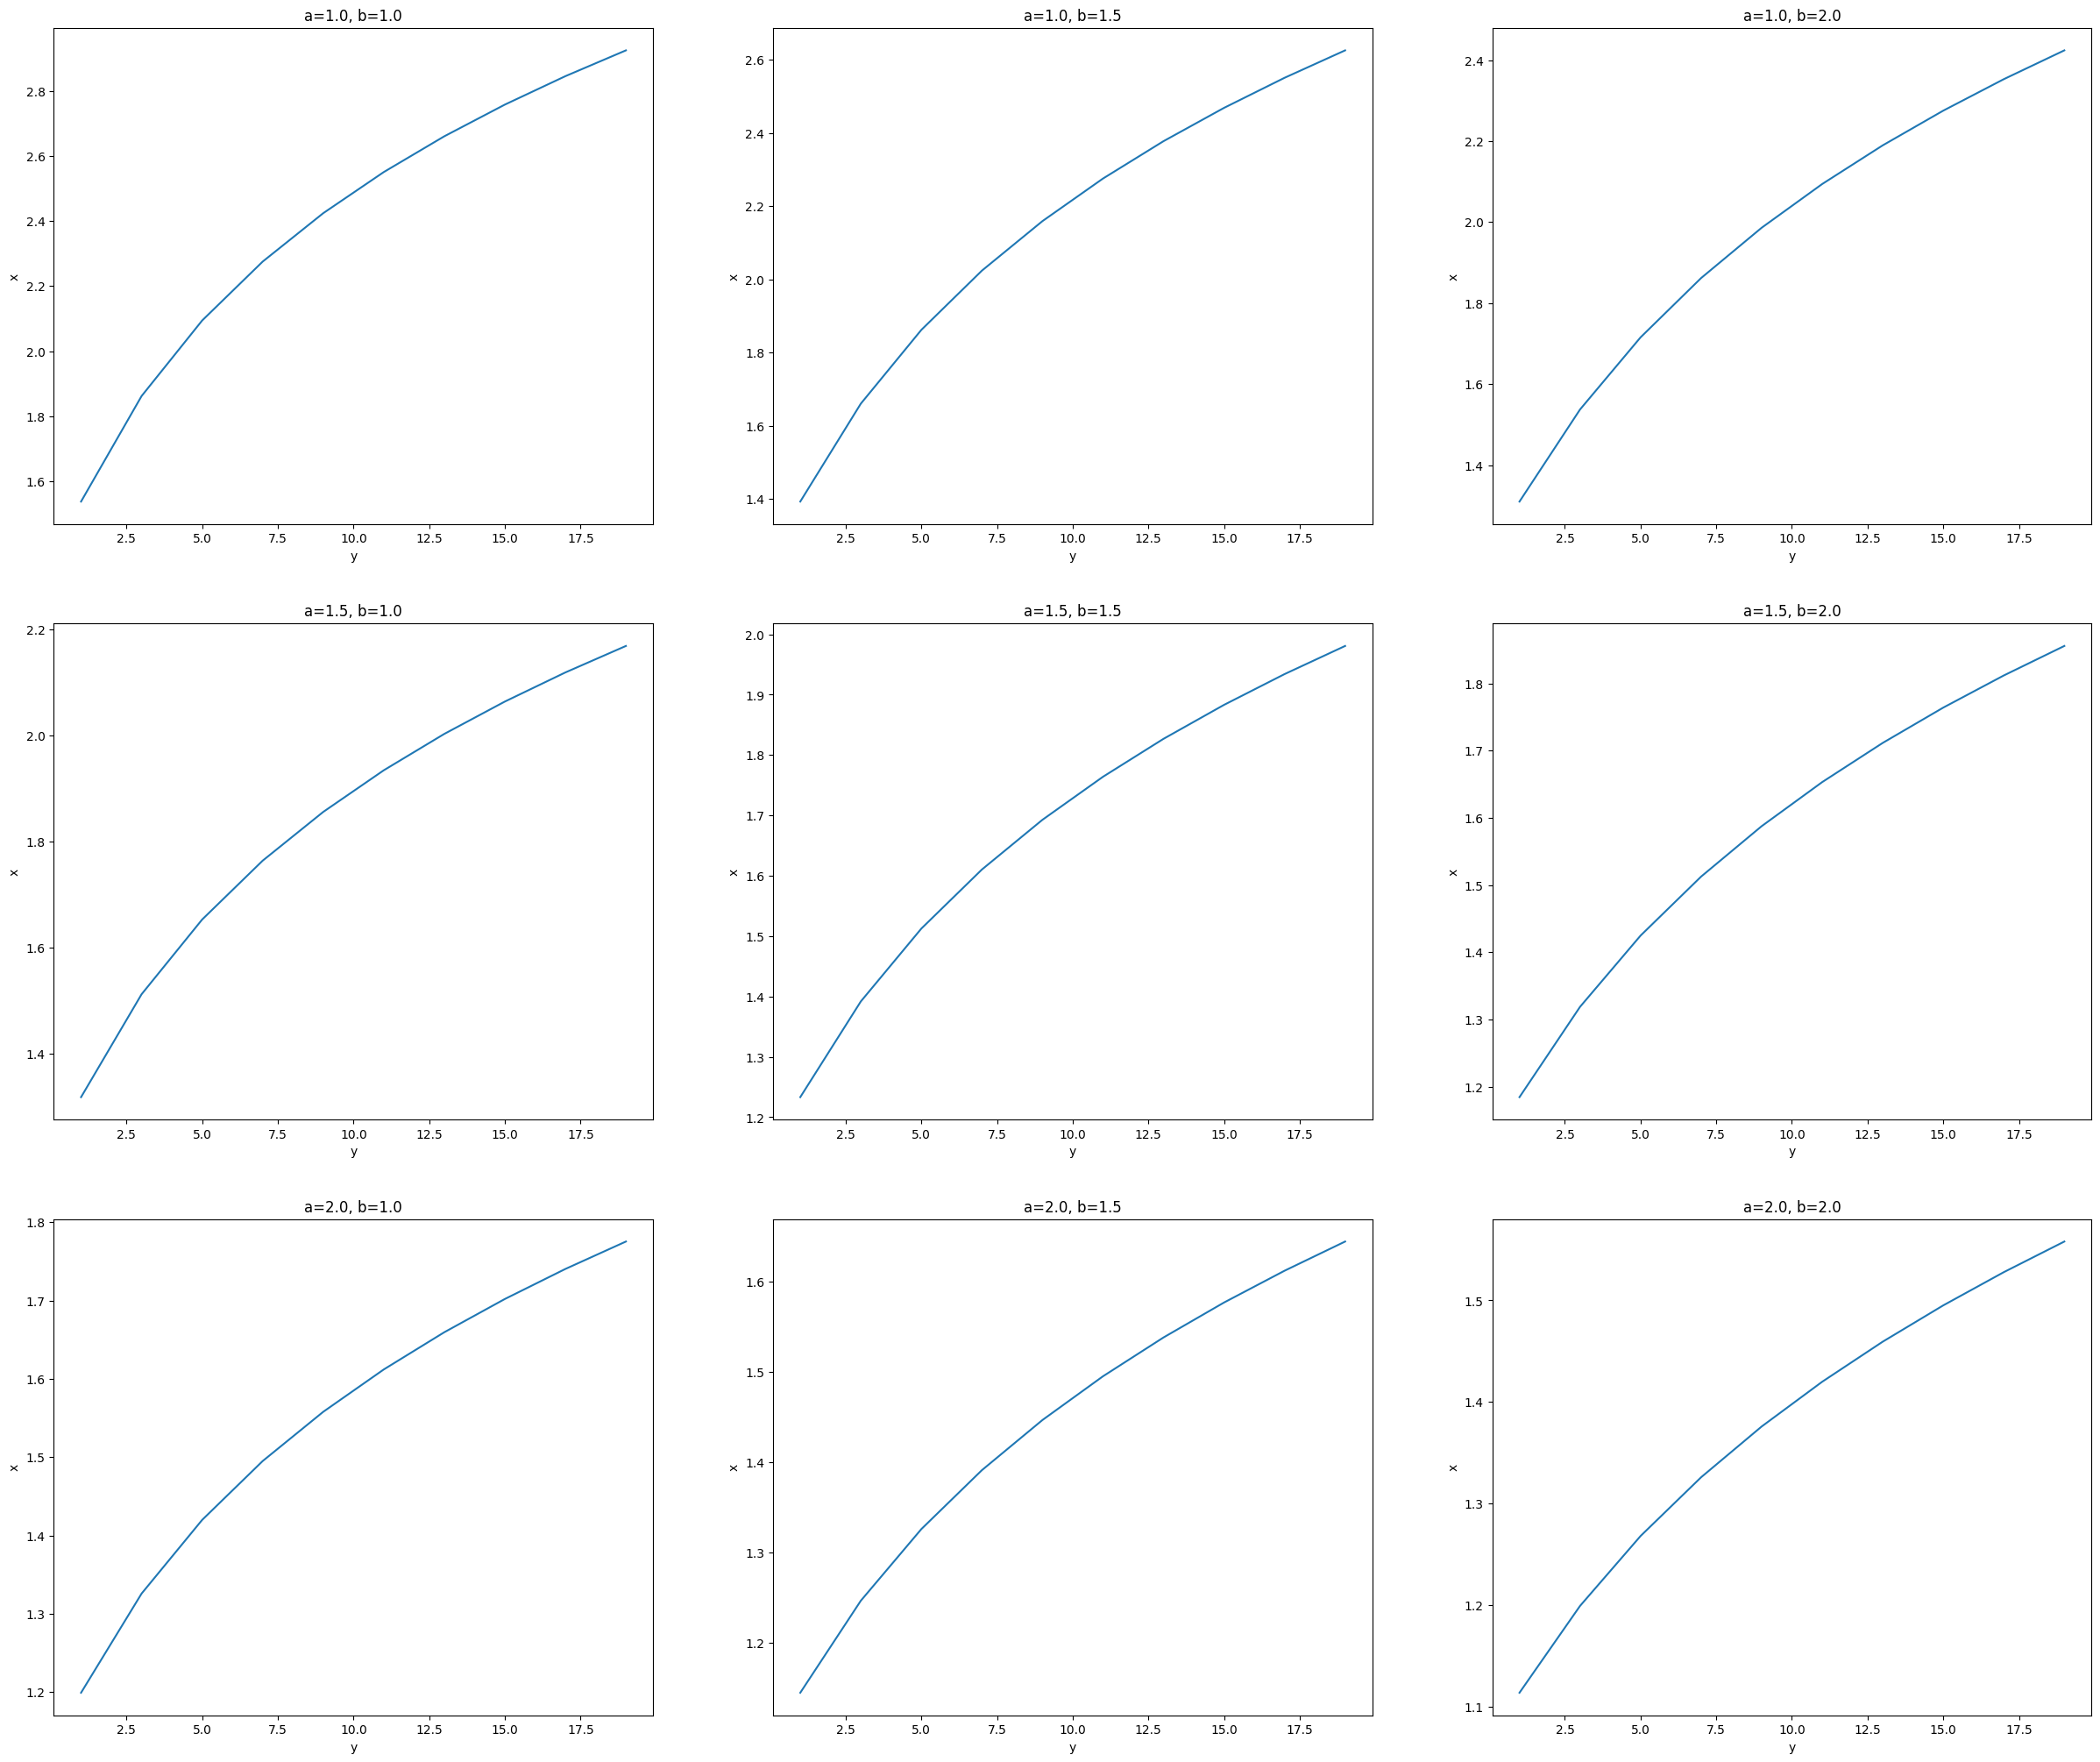

In [11]:
f = lambda x, a, b: np.exp(a * x) * b * np.log(x) - 1
df = lambda x, a, b: np.exp(a * x) * b * (a * np.log(x) + 1 / x)

a_values = np.arange(1.0, 2.1, 0.5)
b_values = np.arange(1.0, 2.1, 0.5)
y_values = np.arange(1.0, 20.1, 2)

results = {}

for a in a_values:
    for b in b_values:
        fab = lambda x: f(x, a, b)
        dfab = lambda x: df(x, a, b)

        x_results = []
        for y in y_values:
            x, niter = inverse(f=fab, df=dfab, y=y, method="newton", x0=1.0)
            x_results.append(x)
        results[(a, b)] = x_results
        # print(x_results)


fig, axes = plt.subplots(3, 3, figsize=(30, 25))
axes = axes.flatten()
i = 0
for (a, b), x_vals in results.items():
    axes[i].plot(y_values, x_vals)
    axes[i].set_title(f"a={a}, b={b}")
    axes[i].set_xlabel('y')
    axes[i].set_ylabel('x')
    i += 1

## Приближенное вычисление неявной функции 

ax + by = c*e^(-(x^2 + y^2)) при x=10

In [118]:
def bisection(f, l=-15, r=15, eps=1e-10, x=10, *args, **kwargs):
    fl = f(x, l, *args, **kwargs)
    fr = f(x, r, *args, **kwargs)

    citer = 0
    while abs(r - l) >= eps:
        citer += 1
        mid = (l + r) / 2
        fmid = f(x, mid, *args, **kwargs)

        if abs(fmid) < eps:
            return mid, citer

        if fl * fmid < 0:
            r = mid 
            fr = fmid
        else:
            l = mid
            fl = fmid

    return (r + l) / 2, citer

def newton(f, df, y0=0, eps=1e-10, x=10, max_iter=100, *args, **kwargs):
    citer = 0
    while citer < max_iter:
        f_val = f(x, y0, *args, **kwargs)
        df_val = df(x, y0, *args, **kwargs)
        if df_val == 0:
            print(f"Производная ноль или не существует: {x}")
            return None, citer
        y1 = y0 - f_val / df_val
        if abs(y1 - y0) < eps:
            return y1, citer
        y0 = y1
        citer += 1
    print(f"Превышено максимальное число итераций: {x}")
    return None, citer

def secant(f, y0=-1, y1=1, eps=1e-10, x=10, max_iter=100, *args, **kwargs):
    f0 = f(x, y0, *args, **kwargs)
    f1 = f(x, y1, *args, **kwargs)
    citer = 0
    while abs(y1 - y0) >= eps and citer < max_iter:
        y2 = y1 - f1 * (y1 - y0) / (f1 - f0)
        f2 = f(x, y2, *args, **kwargs)
        if abs(f2) < eps:
            return y2, citer
        y0, f0 = y1, f1
        y1, f1 = y2, f2
        citer += 1
    
    print(f"Превышено максимальное число итераций: {x}")
    return None, citer

In [119]:
def f(x, y, a=1, b=1, c=1):
    return a*x + b*y - c*np.exp(-(x**2 + y**2))

def dfdy(x, y, a=1, b=1, c=1):
    return b + c*np.exp(-x**2-y**2) * 2*y


print(bisection(f, -15, 15, 1e-10)[0])
print(newton(f, dfdy, 0.1, 1e-10)[0])
print(secant(f, 0.1, 1, 1e-10)[0])

-10.00000000007276
-10.0
-9.999999999999996


Превышено максимальное число итераций: 0.0
Превышено максимальное число итераций: 0.0
Производная ноль или не существует: 1.99
Производная ноль или не существует: 1.99


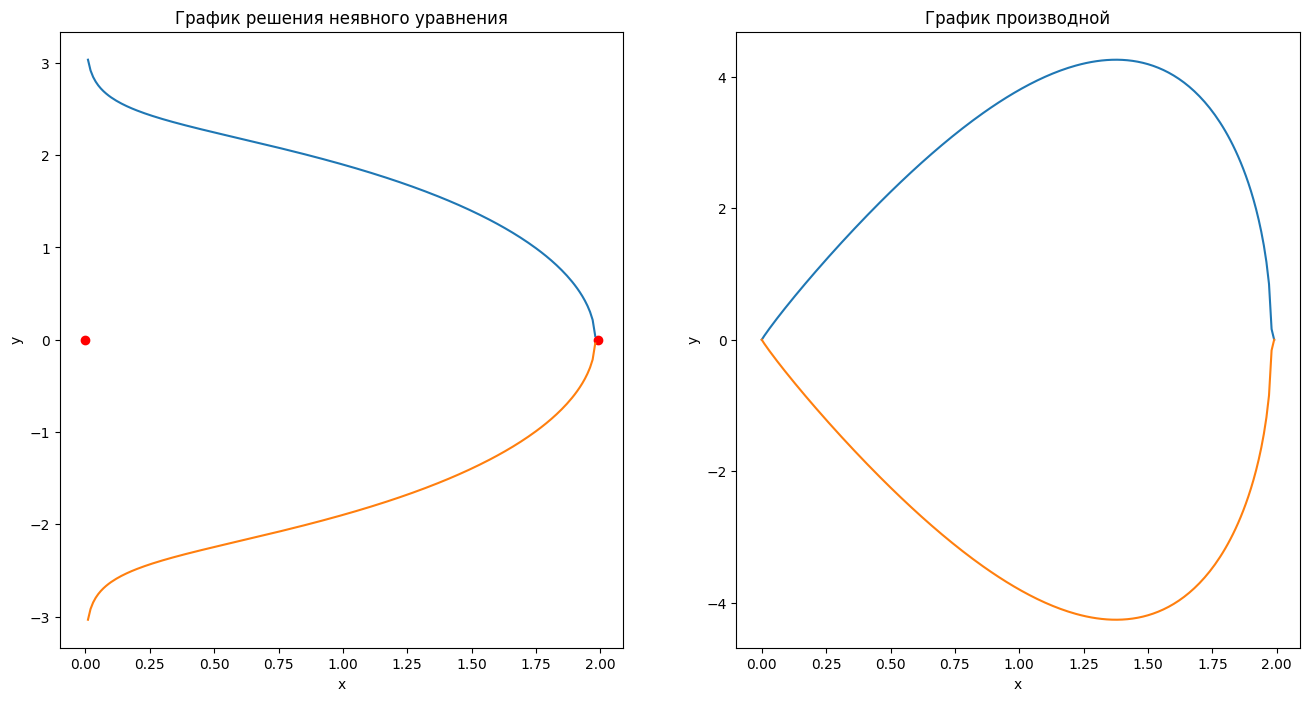

In [125]:
a, b, c = 1, 0, 100
f = lambda x, y: a*x + b*y - c*np.exp(-(x**2 + y**2))
dfdy = lambda x, y: b + c*np.exp(-x**2-y**2) * 2*y

x_values = np.arange(0, 2, 0.01)
y1_values = []
y2_values = []

for x in x_values:
    y1, _ = newton(f, dfdy, y0=1, x=x)
    y2, _ = newton(f, dfdy, y0=-1, x=x)
    y1_values.append(y1)
    y2_values.append(y2)


dfdy1_values = [dfdy(x, y) if y is not None else dfdy(x, 0) for x, y in zip(x_values, y1_values)]
dfdy2_values = [dfdy(x, y) if y is not None else dfdy(x, 0) for x, y in zip(x_values, y2_values)]
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes = axes.flatten()
axes[0].plot(x_values, y1_values)
axes[0].plot(x_values, y2_values)
axes[0].scatter([x_values[i] for i in range(len(x_values)) if y1_values[i] is None],
                [0 for i in range(len(x_values)) if y1_values[i] is None], color='red')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('График решения неявного уравнения')
axes[1].plot(x_values, dfdy1_values)
axes[1].plot(x_values, dfdy2_values)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('График производной')
plt.show()

Точки бифуркации - это возможно точки, в которых df/dy = 0, так как в них нарушается условие теоремы о неявной функции

### Аппроксимация функций одной переменной

Кусочно-линейная интерполяция

In [298]:
def local_linear_interp(x, x0, x1, f0, f1):
    phi0 = (x1 - x) / (x1 - x0)
    phi1 = (x - x0) / (x1 - x0)
    return f0*phi0 + f1*phi1

def adaptive_linear_interpolation(f, a, b, eps=1e-10, max_nodes=200):
    nodes = np.array([a, b], dtype=np.float64)
    values = f(nodes)
    
    for _ in range(max_nodes - 2):
        errors = []
        midx = []
        
        for i in range(len(nodes) - 1):
            x0, x1 = nodes[i], nodes[i + 1]
            x_mid = (x0 + x1) / 2
            f_true = f(x_mid)
            
            f_interp = local_linear_interp(x_mid, x0, x1, values[i], values[i+1])
            
            errors.append(abs(f_true - f_interp))
            midx.append(x_mid)
        
        max_error = max(errors)
        if max_error < eps:
            break
        
        worst_idx = np.argmax(errors)
        new_node = midx[worst_idx]
        nodes = np.insert(nodes, worst_idx + 1, new_node)
        values = np.insert(values, worst_idx + 1, f(new_node))
    
    return nodes, values, max_error

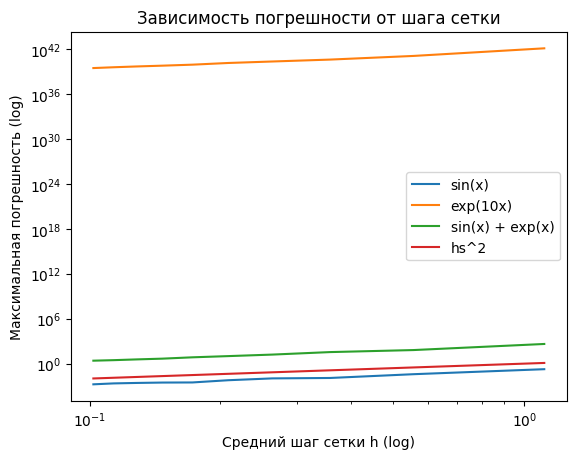

In [299]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.exp(10*x)
f3 = lambda x: np.sin(x) + np.exp(x)

fs = [(f1, "sin(x)"), (f2, 'exp(10x)'), (f3, "sin(x) + exp(x)")]

for f, name in fs:
    ns = np.linspace(10, 100-1, 10)
    errors = []
    hs = []

    for n in ns:
        nodes, values, max_error = adaptive_linear_interpolation(f, 0, 10, max_nodes=int(n))
        errors.append(max_error)
        h = np.mean(np.diff(nodes))
        hs.append(h)

    # print(hs)
    # print(errors)

    plt.loglog(hs, errors, label=name)
    

plt.loglog(hs, np.array(hs)**2, label="hs^2")
plt.xlabel('Средний шаг сетки h (log)')
plt.ylabel('Максимальная погрешность (log)')
plt.title('Зависимость погрешности от шага сетки')
plt.legend()
plt.show()

Кусочно-квадратичная интерполяция

In [300]:
def local_quadratic_interp(x, x0, x1, f0, f1, f_mid):
    x_mid = (x0 + x1) / 2
    L0 = ((x - x_mid)*(x - x1)) / ((x0 - x_mid)*(x0 - x1))
    L1 = ((x - x0)*(x - x1)) / ((x_mid - x0)*(x_mid - x1))
    L2 = ((x - x0)*(x - x_mid)) / ((x1 - x0)*(x1 - x_mid))
    return f0 * L0 + f_mid * L1 + f1 * L2

def adaptive_quadratic_interpolation(f, a, b, eps=1e-10, max_nodes=200):
    nodes = [a, (a + b) / 2, b]
    values = {x: f(x) for x in nodes}

    for _ in range(max_nodes-3):
        new_nodes = []
        max_error = 0.0

        for i in range(len(nodes) - 1):
            x0 = nodes[i]
            x1 = nodes[i + 1]
            x_mid = (x0 + x1) / 2

            f0 = values[x0]
            f1 = values[x1]
            f_mid = values.get(x_mid, f(x_mid))

            x_test1 = x0 + (x1 - x0) / 3
            x_test2 = x0 + 2 * (x1 - x0) / 3

            y_interp1 = local_quadratic_interp(x_test1, x0, x1, f0, f1, f_mid)
            y_interp2 = local_quadratic_interp(x_test2, x0, x1, f0, f1, f_mid)

            error1 = abs(f(x_test1) - y_interp1)
            error2 = abs(f(x_test2) - y_interp2)
            local_error = max(error1, error2)

            new_nodes.append(x_mid)
            values[x_mid] = f_mid
            max_error = max(max_error, local_error)

        if not new_nodes or len(nodes) + len(new_nodes) > max_nodes:
            break

        nodes.extend(new_nodes)
        nodes = sorted(set(nodes))

    nodes = np.array([x for x in values.keys()])
    values = np.array([x for x in values.values()])

    return nodes, values, max_error

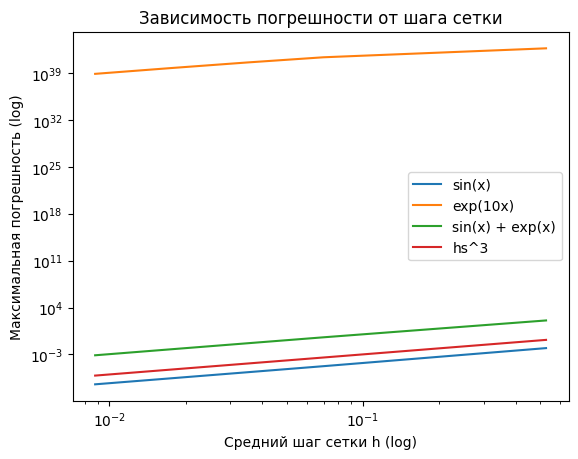

In [301]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.exp(10*x)
f3 = lambda x: np.sin(x) + np.exp(x)

fs = [(f1, "sin(x)"), (f2, 'exp(10x)'), (f3, "sin(x) + exp(x)")]

for f, name in fs:
    ns = np.linspace(10, 1000-1, 10)
    errors = []
    hs = []

    for n in ns:
        nodes, values, max_error = adaptive_quadratic_interpolation(f, 1, 10, max_nodes=int(n))
        errors.append(max_error)
        h = np.mean(np.diff(nodes))
        hs.append(h)
        # print(nodes, values, max_error)

    # print(hs)
    # print(errors)

    plt.loglog(hs, errors, label=name)
    

plt.loglog(hs, np.array(hs)**3, label="hs^3")
plt.xlabel('Средний шаг сетки h (log)')
plt.ylabel('Максимальная погрешность (log)')
plt.title('Зависимость погрешности от шага сетки')
plt.legend()
plt.show()

Кусочно-кубическая интерполяция

In [302]:
def local_cubic_interp(x, x0, x1, f0, f1, f13, f23):
    x13 = x0 + (x1 - x0) / 3
    x23 = x0 + 2 * (x1 - x0) / 3

    # Узлы интерполяции
    nodes = np.array([x0, x13, x23, x1])
    values = np.array([f0, f13, f23, f1])

    # Вычисление базисных функций Лагранжа
    L = []
    for i in range(4):
        xi = nodes[i]
        others = np.delete(nodes, i)
        denom = np.prod(xi - others)
        numer = np.prod([x - xj for xj in others], axis=0)
        L.append(numer / denom)

    return np.dot(values, L)


def adaptive_cubic_interpolation(f, a, b, eps=1e-10, max_nodes=200):
    nodes = [a, (a + b) / 2, b]
    values = {x: f(x) for x in nodes}

    for _ in range(max_nodes - 3):
        new_nodes = []
        max_error = 0.0

        for i in range(len(nodes) - 1):
            x0 = nodes[i]
            x1 = nodes[i + 1]
            h = x1 - x0
            x13 = x0 + h / 3
            x23 = x0 + 2 * h / 3

            f0 = values[x0]
            f1 = values[x1]
            f13 = values.get(x13, f(x13))
            f23 = values.get(x23, f(x23))

            x_test1 = x0 + h / 4
            x_test2 = x0 + 3 * h / 4

            y_interp1 = local_cubic_interp(x_test1, x0, x1, f0, f1, f13, f23)
            y_interp2 = local_cubic_interp(x_test2, x0, x1, f0, f1, f13, f23)

            error1 = abs(f(x_test1) - y_interp1)
            error2 = abs(f(x_test2) - y_interp2)
            local_error = max(error1, error2)

            max_error = max(max_error, local_error)

            for x_new in [x13, x23]:
                if x_new not in values:
                    new_nodes.append(x_new)
                    values[x_new] = f(x_new)

        if not new_nodes or len(nodes) + len(new_nodes) > max_nodes:
            break

        nodes.extend(new_nodes)
        nodes = sorted(set(nodes))

    nodes = np.array([x for x in values.keys()])
    values = np.array([x for x in values.values()])

    return nodes, values, max_error

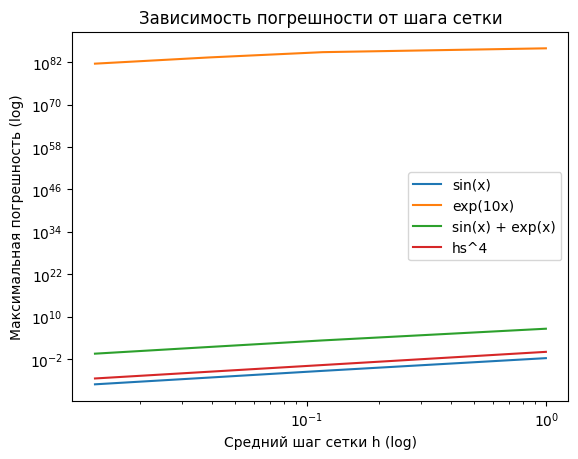

In [303]:
f1 = lambda x: np.sin(x)
f2 = lambda x: np.exp(10*x)
f3 = lambda x: np.sin(x) + np.exp(x)

fs = [(f1, "sin(x)"), (f2, 'exp(10x)'), (f3, "sin(x) + exp(x)")]

for f, name in fs:
    ns = np.linspace(10, 1000-1, 10)
    errors = []
    hs = []

    for n in ns:
        nodes, values, max_error = adaptive_cubic_interpolation(f, 1, 20, max_nodes=int(n))
        errors.append(max_error)
        h = np.mean(np.diff(nodes))
        hs.append(h)
        # print(nodes, values, max_error)

    # print(hs)
    # print(errors)

    plt.loglog(hs, errors, label=name)
    

plt.loglog(hs, np.array(hs)**4, label="hs^4")
plt.xlabel('Средний шаг сетки h (log)')
plt.ylabel('Максимальная погрешность (log)')
plt.title('Зависимость погрешности от шага сетки')
plt.legend()
plt.show()

1. Приближенное решение нелинейных уравнений от одной переменной
- Опробовать на задаче про русла разной ширины (Ньютона, Бисекций, Секущих)
- Решить f(x) = 0
- Найти обратную функцию
- Вычислить значение неявной функции f(x, y) = 0. Определить точки ветвления(бифуркации).
2. Аппроксимация функций (одной переменной)
- Кусочно-линейная интерполяция (показать h^2 сходимость для функций C^2)
- Кусочно-квадратичная интерполяция (показать h^3 сходимость для функций C^3)
- Кусочно-кубическая интерполяция (показать h^4 сходимость), прелагается использовать fh из S3h


- fh(x) как разреженная матрица
- Для второй простые функции sin(kpx), exp(ax),

Для чего использовать квадратичную интерполяцию и как формируется глобальный базис из локального.
csrc

- Метод наименьших квадратов (Добавить регуляризацию)